### notes
file with issue:

- /home/royliu/./Documents/datasets/profile_train_infer/train_resnet152/models_4_Resnet152_8_Training/models_4_resnet50+vgg16+densenet121+googlenet/azure-infer_log_server_0rps_ train_resnet152_8+infer_resnet50_20230327.csv

- /home/royliu/./Documents/datasets/profile_train_infer/efficientnetV2/models_4_efficientnet_2_Training/models_4_resnet50+mobilenet_v3_small+efficientnet_v2_l+googlenet/azure-infer_log_server_0rps_ train_efficientnet_v2_l_2+infer_mobilenet_v3_small_20230329.csv

- prof file record is missing and dupplicated in efficientnetV2

## 1. prepare time_clip file for clipping profilling data

In [12]:
'''
traverse the raw data, generate the time clip for associating profiling data
'''
import os 
import re
import pandas as pd
root = os.environ['HOME']
date_list,time_start_list,time_end_list,train_type_list =[],[],[],[]
comb_type_list,infer_model_list,co_infer_models_list,file_path_list=[],[],[],[]

folder_train = os.path.join(root,'./Documents/datasets/profile_train_infer/train_none')  ## efficientnetV2, train_none, train_resnet152
train_type = re.findall(r'.+/(.+)', folder_train)[0]
folders =  os.listdir(folder_train)

data = pd.DataFrame(columns = ['date','time_start','time_end','train_type','combination_type','infer_model','co-infer_models','file_path'])
cnt= 0
for comb_folder in folders: # e.g. models_1_No_Training
    path= os.path.join(folder_train, comb_folder)  #e.g. ./train_none/models_2_No_Training
    if not os.path.isdir(path): continue  # only process with folder, skip profile_Train arch_None20230325.csv
    comb_type = re.findall(r'(models_[0-9]).+',comb_folder)[0]  ## e.g. models_2
    items = os.listdir(path)

    for item in items:
        file_folder = os.path.join(path,item) 
        if os.path.isfile(file_folder):  ## if item here is file name
            file_path = file_folder
            date_list.append(re.findall(r'.+_(.+).csv',item)[0])
            comb_type_list.append('model_1')
            train_type_list.append(train_type)
            infer_model_list.append(re.findall(r'.+\+infer_(.+)_.+.csv',item)[0])
            co_infer_models_list.append('na')
            file_path_list.append(file_path)
            
            ## extract start, end time
            df = pd.read_csv(file_path)
            start, end = df['work_start'].iloc[100], df['work_start'].iloc[-1]  ## 100: take out warmup data
            time_start_list.append(start)
            time_end_list.append(end)
            
            cnt+=1
        else:
            sub_path = os.path.join(path,item)            
            for file in os.listdir(sub_path):  ## sub_path: ./train_none/models_2_No_Training/models_2_resnet50+googlenet/
                file_path = os.path.join(sub_path,file)
                date_list.append(re.findall(r'.+_(.+).csv',file_path)[0])  #e.g. 20230325
                comb_type_list.append(re.findall(r'(models_[0-9]).+',item)[0])  #e.g. models_2
                train_type_list.append(train_type)  #e.g. train_none
                infer_model_list.append(re.findall(r'.+\+infer_(.+)_.+.csv',file_path)[0])  ##e.g.: efficientnet_v2_l
                co_infer_models_list.append(re.findall(r'models_[0-9]_(.+)',item)[0]) ##e.g.: 'googlenet+alexnet'
                file_path_list.append(file_path)
                
                ## extract start, end time
#                 print(file_path)
                try:
                    df = pd.read_csv(file_path)
                    start = df['work_start'].iloc[100] ## 100: take out warmup data
                    end =  df['work_start'].iloc[-1]  

                except:
                    print("File issue:", file_path)
                    start = df['work_start'].iloc[1] 
                    end =  df['work_start'].iloc[-1] 
                    pass
                
                time_start_list.append(start)
                time_end_list.append(end)
                
                cnt+=1

## ['date','time_start','time_end','train_type','combination_type','infer_model','co-infer_models','file_path']                
data['date']=date_list
data['time_start'] = time_start_list
data['time_end']= time_end_list
data['train_type']= train_type_list
data['combination_type']=comb_type_list
data['infer_model']=infer_model_list
data['co-infer_models']=co_infer_models_list
data['file_path'] = file_path_list
data.to_csv(os.path.join(root,'./Documents/datasets/profile_train_infer', ('time_clip_'+train_type+'.csv')), index = False)
print('Total %d files'%cnt)

Total 512 files


In [79]:
data

,date,time_start,time_end,train_type,combination_type,infer_model,co-infer_models,file_path
0,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_3,alexnet,resnet50+inception_v3+alexnet,/home/royliu/./Documents/datasets/profile_trai...
1,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_3,inception_v3,resnet50+inception_v3+alexnet,/home/royliu/./Documents/datasets/profile_trai...
2,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_3,resnet50,resnet50+inception_v3+alexnet,/home/royliu/./Documents/datasets/profile_trai...
3,20230328,1.679862e+09,1.679863e+09,train_resnet152,models_3,inception_v3,inception_v3+densenet121+alexnet,/home/royliu/./Documents/datasets/profile_trai...
4,20230328,1.679862e+09,1.679863e+09,train_resnet152,models_3,alexnet,inception_v3+densenet121+alexnet,/home/royliu/./Documents/datasets/profile_trai...
...,...,...,...,...,...,...,...,...
507,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_2,densenet121,efficientnet_v2_l+densenet121,/home/royliu/./Documents/datasets/profile_trai...
508,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_2,vgg16,vgg16+mobilenet_v3_small,/home/royliu/./Documents/datasets/profile_trai...
509,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_2,mobilenet_v3_small,vgg16+mobilenet_v3_small,/home/royliu/./Documents/datasets/profile_trai...
510,20230326,1.679862e+09,1.679863e+09,train_resnet152,models_2,alexnet,densenet121+alexnet,/home/royliu/./Documents/datasets/profile_trai...


In [53]:
cols = data_prof.columns
cols

Index(['time_stamp', 'gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%'],
      dtype='object')

## 2. Extract prof data by cliping time

In [31]:
import os 
import re
import pandas as pd
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer')
train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

# train_files = train_resnet 
# file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
# data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
# data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
# data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
# comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
# comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
# comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
# comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

### 2.1 check the number of records

In [30]:
### train_none
'''
check prof record number
total length of prof records :, e.g. train_none
comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128

'''
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_files = train_none 
file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

cols = data_prof.columns
combs = [comb1, comb2, comb3, comb4]
for i, comb in enumerate(combs):
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)):
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
#         data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128


### 2.2 extract data by comb 

In [36]:
combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4']
]


In [2]:
'''Extract clipped profiling data by train model and combination type (comb1,... comb4)

output is a 2 dimentinal dataset, as:

    Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
    comb1 profilling record # : 3703
    comb2 profilling record # : 25664
    comb3 profilling record # : 77359
    comb4 profilling record # : 130128
    Train model:  ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')
    comb1 profilling record # : 3627
    comb2 profilling record # : 25395
    comb3 profilling record # : 76523
    comb4 profilling record # : 92878
    Train model:  ('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
    comb1 profilling record # : 3657
    comb2 profilling record # : 25532
    comb3 profilling record # : 77002
    comb4 profilling record # : 327906

'''


import os 
import re
import pandas as pd
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer')
train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4']
]
train_list = [train_none,train_resnet,train_efficientnet]

for j, train_files in enumerate(train_list):

    file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
    data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
    data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
    data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
    cols = data_prof.columns
    comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
    comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
    comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
    comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()
    combs = [comb1, comb2, comb3, comb4]
    # for i in range(4):
    # #     print(combs_segs[1][i])
    #     combs_segs[1][i] = combs[i]   ## data_clip
    print('Train model: ', train_list[j])
    for i, comb in enumerate(combs):  ## iterate comb1 to comb4
        data_seg = pd.DataFrame(columns= cols)
        l=0
        for idx in range(len(comb)): ## in specific comb, e.g. comb1
            start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
            data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
            data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
            combs_segs[j][i] =  data_seg
        #     print(len(data_prof_clipped))
            l+= len(data_prof_clipped)
        print(f'comb{i+1} profilling record # : {l}')

Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128
Train model:  ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')
comb1 profilling record # : 3627
comb2 profilling record # : 25395
comb3 profilling record # : 76523
comb4 profilling record # : 92878
Train model:  ('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
comb1 profilling record # : 3657
comb2 profilling record # : 25532
comb3 profilling record # : 77002
comb4 profilling record # : 327906


In [5]:
## take a look at extracted data:
combs_segs[2][0]  ##e.g. efficientNet, comb1

,time_stamp,gpu_power,gpu_freq,gpu_mem_freq,gpu_temp,gpu_util%,gpu_mem_util%
3003,1.680044e+09,155.87,1815.0,9251.0,55.0,36.0,9.0
3004,1.680044e+09,153.89,1755.0,9251.0,55.0,36.0,11.0
3005,1.680044e+09,148.02,1755.0,9251.0,55.0,37.0,9.0
3006,1.680044e+09,148.57,1755.0,9251.0,55.0,35.0,9.0
3007,1.680044e+09,148.91,1755.0,9251.0,55.0,39.0,10.0
...,...,...,...,...,...,...,...
2477,1.680044e+09,155.88,1815.0,9251.0,56.0,36.0,10.0
2478,1.680044e+09,155.54,1815.0,9251.0,56.0,36.0,10.0
2479,1.680044e+09,176.68,1965.0,9251.0,57.0,38.0,10.0
2480,1.680044e+09,185.75,1965.0,9251.0,57.0,33.0,10.0


## 3 plotting

In [ ]:
## 3.1 gpu power

sub_folder_list = sorted(os.listdir(root), reverse=False)  #experiment mode
for i, mode in enumerate(sub_folder_list):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, p)

x_axis= np.arange(len(cols))  
plt.xticks(x_axis, cols, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) ', fontsize= 15) 
plt.legend(mode_list, loc=2)

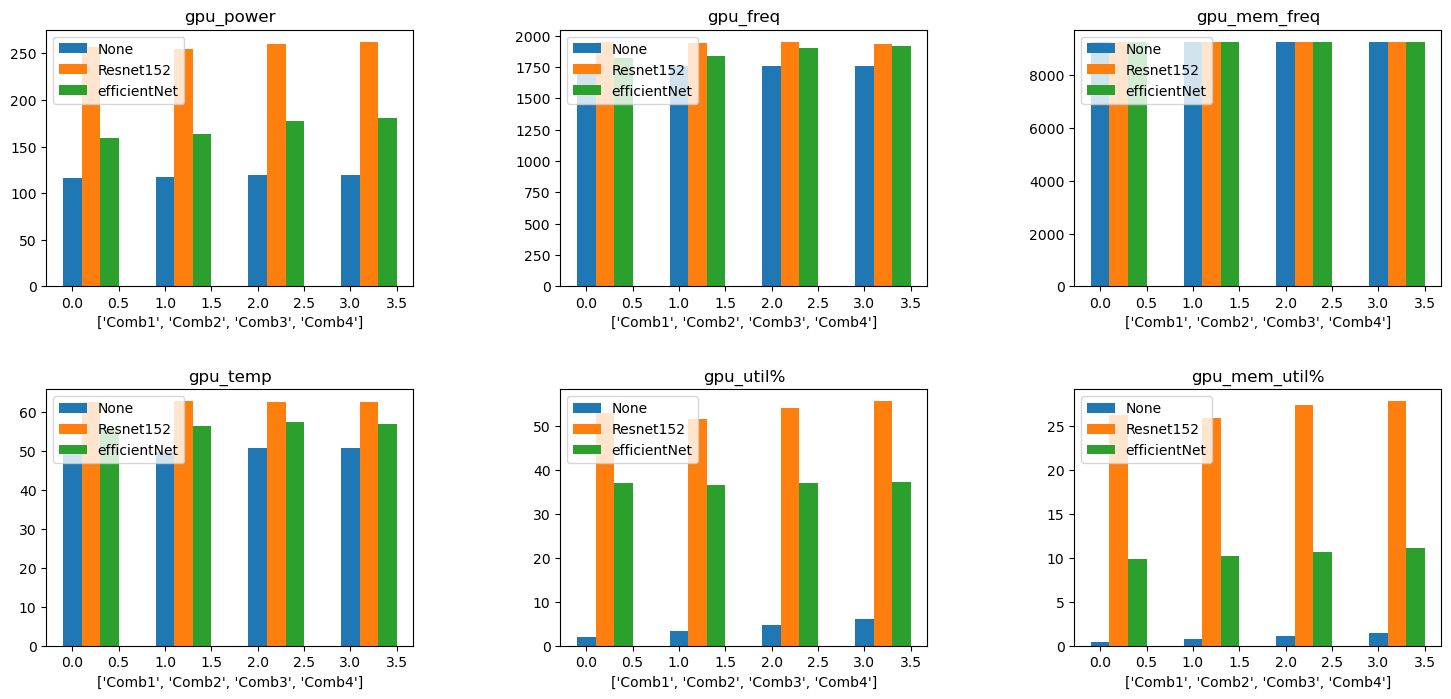

In [64]:
## combs_segs
import numpy as np
import matplotlib.pyplot as plt
cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
plot=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.4)
comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None', 'Resnet152', 'efficientNet']

for k, col in enumerate(cols):
    plt.subplot(2,3,k+1) # e.g 
    for j in range(len(train_list )):
        value_list = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[j][i]
            value = np.mean(dt[col].values)
            value_list.append(value)
        X= np.arange(4) # comb 1-- comb4
        pos= 0.4
        plt.bar(X+j*.2, value_list, width =0.2, label = col)
    plt.xlabel(comb_name_list, fontsize= 10)
    plt.title(cols[k])
#     plt.ylabel(cols[k], fontsize= 15) 
    plt.legend(train_name_list, loc=2)
    #         print(value)

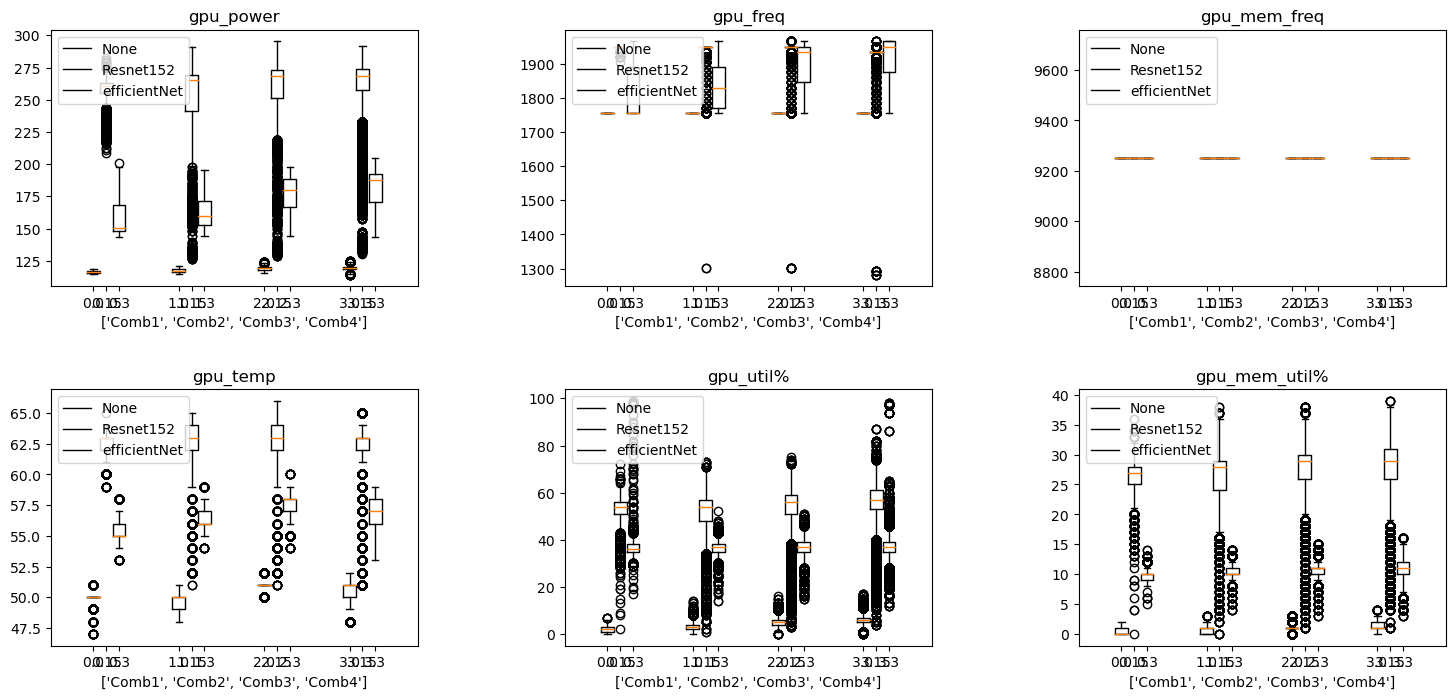

In [83]:
## combs_segs
import numpy as np
import matplotlib.pyplot as plt
cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
plot=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.4)
comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None', 'Resnet152', 'efficientNet']

for k, col in enumerate(cols):
    plt.subplot(2,3,k+1) # e.g 
    for j in range(len(train_list )):
        value_list = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[j][i]
            value = np.mean(dt[col].values)
            value_list.append(value)
            plt.boxplot(dt[col].values, widths =0.15, positions = [i+j*.15])
        X= np.arange(4) # comb 1-- comb4
        pos= 0.4
    plt.xlabel(comb_name_list, fontsize= 10)
    plt.title(cols[k])
#     plt.ylabel(cols[k], fontsize= 15) 
    plt.legend(train_name_list, loc=2)
    #         print(value)

## backup


In [ ]:
## resnet:
import os 
import re
import pandas as pd
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer')
train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')


folder_train = os.path.join(root,'./Documents/datasets/profile_train_infer/train_none')  ## efficientnetV2, train_none, train_resnet152
train_type = re.findall(r'.+/(.+)', folder_train)[0]
folders =  os.listdir(folder_train)

combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4']
]


train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

train_files = train_resnet 
file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
cols = data_prof.columns
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()
combs = [comb1, comb2, comb3, comb4]
# for i in range(4):
# #     print(combs_segs[1][i])
#     combs_segs[1][i] = combs[i]   ## data_clip

for i, comb in enumerate(combs):  ## iterate comb1 to comb4
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)): ## in specific comb, e.g. comb1
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
        data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
        combs_segs[1][i] =  data_seg
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

In [32]:
### train_resnet152
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

train_files = train_resnet 
file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

'''
check prof record number:
comb1 profilling record # : 3627
comb2 profilling record # : 25395
comb3 profilling record # : 76523
comb4 profilling record # : 92878

'''

cols = data_prof.columns
combs = [comb1, comb2, comb3, comb4]
for i, comb in enumerate(combs):
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)):
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
#         data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

comb1 profilling record # : 3627
comb2 profilling record # : 25395
comb3 profilling record # : 76523
comb4 profilling record # : 92878
